# Objective : Learning the usage of PCA in recommendations using decision trees

# Problem : Consider the data given below: Estimate the ratings $r_{21}$ and $r_{74}$

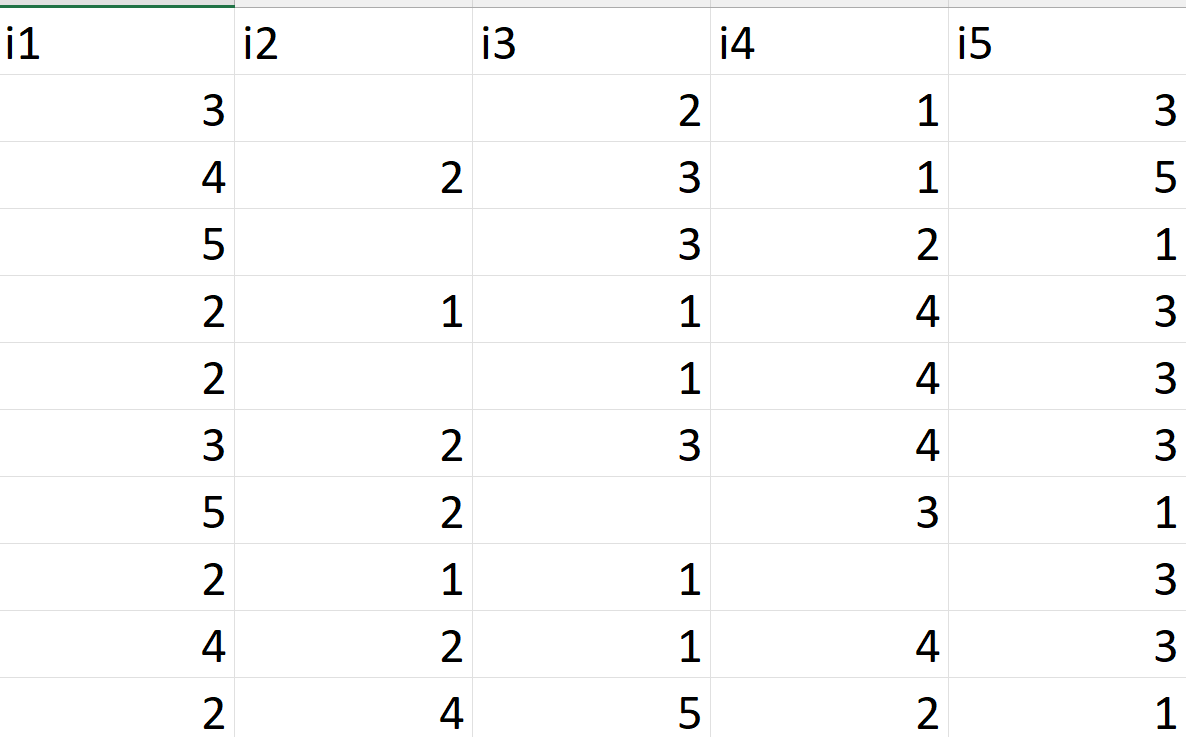

In [6]:
import pandas as pd
df=pd.read_csv("dec-pca.csv")
df

,i1,i2,i3,i4,i5
0,3,NaN,2.0,1.0,3
1,4,2.0,3.0,1.0,5
2,5,NaN,3.0,2.0,1
3,2,1.0,1.0,4.0,3
4,2,NaN,1.0,4.0,3
5,3,2.0,3.0,4.0,3
6,5,2.0,NaN,3.0,1
7,2,1.0,1.0,NaN,3
8,4,2.0,1.0,4.0,3
9,2,4.0,5.0,2.0,1


# To predict $r_{21}$ we treat the second column as response and others as regressors

# Dropping rows with missing values

In [22]:
df_full=df.dropna()
df_full

,i1,i2,i3,i4,i5
1,4,2.0,3.0,1.0,5
3,2,1.0,1.0,4.0,3
5,3,2.0,3.0,4.0,3
8,4,2.0,1.0,4.0,3
9,2,4.0,5.0,2.0,1


# Seperation of regressors and response

In [23]:
X=df_full.iloc[:,[0,2,3,4]] # regressor
y=df_full.iloc[:,1] # response
X

,i1,i3,i4,i5
1,4,3.0,1.0,5
3,2,1.0,4.0,3
5,3,3.0,4.0,3
8,4,1.0,4.0,3
9,2,5.0,2.0,1


# Dimension Reduction

In [14]:
from sklearn.decomposition import PCA
import numpy as np
pca=PCA()
pca.fit(X)
np.cumsum(pca.explained_variance_ratio_)

array([0.5382876 , 0.91404021, 0.97034905, 1.        ])

# Assume, it is decided to retain 90% variance. In this case, we have to retain only 2 features

In [16]:
pca=PCA(n_components=2)
pca.fit(X)
X_red=pca.transform(X)
X_red

array([[ 0.2927037 ,  3.00520003],
       [-1.51913323, -1.13136872],
       [-0.12204071, -0.56874544],
       [-1.92163197, -0.30818626],
       [ 3.27010221, -0.99689962]])

# Fitting a decision tree based on the reduced data; here we treat the X_red as data and y as target

from sklearn import  tree
clf=tree.DecisionTreeClassifier()
model1=clf.fit(X_red,y)

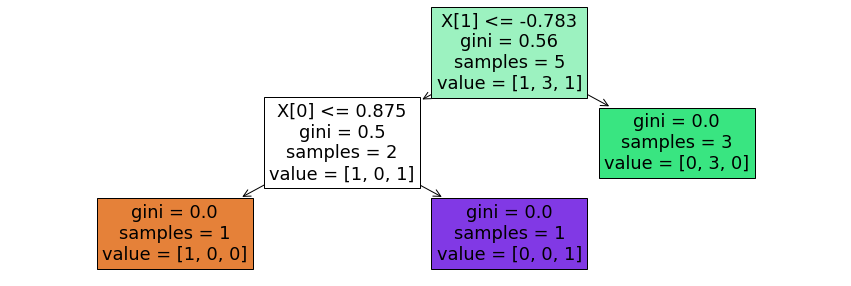

In [19]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(15,5))
_=tree.plot_tree(clf,filled=True)

# Inline Prediction

In [21]:
model1.predict(X_red) # inline prediction

array([2., 1., 2., 2., 4.])

# Predicting $r_{21}$

Note that the values of available features for this instance are 3,2,1,3


In [34]:
test=np.array([[3,2,1,3]])
test_red=pca.transform(test)
model1.predict(test_red)


array([2.])

# Predicted rating is 2

# Model for estimating $r_{74}$

In [37]:
X=df_full.iloc[:,[0,1,2,4]] # regressor
y=df_full.iloc[:,3] # response
pca=PCA()
pca.fit(X)
np.cumsum(pca.explained_variance_ratio_)

array([0.68490769, 0.92294335, 0.99606983, 1.        ])

In [38]:
pca=PCA(n_components=2)
pca.fit(X)
X_red=pca.transform(X)

array([[-1.07424083,  1.98350493],
       [-1.39946408, -1.58412596],
       [ 0.18188525,  0.17887191],
       [-1.44306887, -0.39417146],
       [ 3.73488853, -0.18407942]])

In [39]:
clf=tree.DecisionTreeClassifier()
model2=clf.fit(X_red,y)

In [40]:
test=np.array([[2,1,1,3]])
test_red=pca.transform(test)
model2.predict(test_red)


array([4.])

# Predicted rating is 4